# Reconocimiento de células infectadas por malaria

En este fichero trabajaremos con un dataset de imágenes de células. Nuestro objetivo será detectar si una célula está infectada por la malaria. Lo primero que hacemos es importar las librerías necesarias para desarrollar el trabajo.

In [1]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import collections

## Preparación de los datos

A continuación, procedemos a la carga de los datos. Preparamos todas las imágenes y sus etiquetas.

In [2]:
def load_ml_data():
    labels = []
    images = []
    file_names = [os.path.join("cell_images/Parasitized", f)
                     for f in os.listdir("cell_images/Parasitized")
                     if f.endswith(".png")]
        
    for f in file_names:
        images.append(imd.imread(f))
        labels.append(0)
    
    file_names = [os.path.join("cell_images/Uninfected", f)
                    for f in os.listdir("cell_images/Uninfected")
                    if f.endswith(".png")]
        
    for f in file_names:
        img=mpimg.imread(f)
        images.append(img)
        labels.append(1)
        
    return images, labels

In [3]:
images, labels = load_ml_data()

In [4]:
images = np.array(images)
labels = np.array(labels)

La variables *images* y *labels* tienen una única dimensión, ya que son arrays.

In [5]:
images.ndim

1

Nuestro dataset está formado por 27558 imágenes.

In [6]:
images.size

27558

In [23]:
# ver que se han almacenado correctamente los pixeles
images[2000][45]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [208, 150, 139],
       [207, 143, 141],
       [205, 134, 140],
       [200, 123, 139],
       [196, 112, 138],
       [192, 102, 138],
       [188,  93, 135],
       [184,  84, 136],
       [180,  79, 135],
       [178,  74, 135],
       [177,  78, 133],
       [180,  83, 137],
       [181,  87, 137],
       [186,  97, 143],
       [192, 105, 147],
       [190, 106, 142],
       [192, 111, 144],
       [193, 113, 142],
       [194, 116, 140],
       [196, 119, 139],
       [194, 120, 135],
       [195, 122, 133],
       [199, 126, 135],
       [202, 129, 136],
       [203, 132, 136],
       [205, 134, 138],
       [204, 133, 137],
       [201, 130, 134],
       [201, 130, 134],
       [202, 131, 135],
       [201, 130, 134],
       [198, 127, 131],
       [199, 128

Vamos a ver unas imágenes de ejemplo del dataset junto con algunos de sus datos.

In [8]:
import random
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[4992, 22448, 9855, 4852, 17835, 22240]

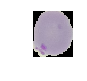

Forma:(124, 106, 3), min:0, max:236


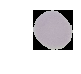

Forma:(124, 124, 3), min:0.0, max:0.8117647171020508


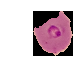

Forma:(145, 127, 3), min:0, max:239


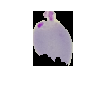

Forma:(157, 112, 3), min:0, max:223


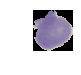

Forma:(127, 124, 3), min:0.0, max:0.8352941274642944


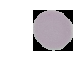

Forma:(130, 127, 3), min:0.0, max:0.772549033164978


In [9]:
import matplotlib.pyplot as plt
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    imgplot = plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

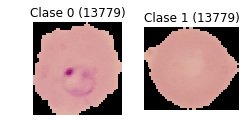

In [10]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

---
Para poder trabajar con las imágenes, debemos transformarlas a matrices de 50x50. De este modo, cumplimos dos objetivos:


1.   Todas las imágenes tienen el mismo tamaño
2.   Todas las imágenes son matrices



In [11]:
from skimage import transform

Aquí se puede observar que hay imágenes de 40x46. Sin embargo, al transformarlas veremos que todas quedan con un tamaño de 50x50.

In [12]:
w = 9999 
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 40x46


In [13]:
images50 = [transform.resize(image, (50,50)) for image in images]

C:\Users\Sergio Cavero\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Sergio Cavero\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


A continuación veremos que las imágenes transformadas tienen tres dimensiones (50, 50, 3). Esto nos indica que las imágenes tienen un tamaño de 50x50 y que tenemos tres canales, ya que las imágenes están a color. Es decir, que cada píxel está formado por tres valores, correspondientes a los canales de color RGB.

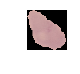

Forma:(50, 50, 3), min:0.0, max:0.8517698127567771


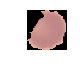

Forma:(50, 50, 3), min:0.0, max:0.9095451034307476


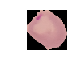

Forma:(50, 50, 3), min:0.0, max:0.8634352941176477


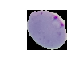

Forma:(50, 50, 3), min:0.0, max:0.8356941176470583


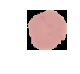

Forma:(50, 50, 3), min:0.0, max:0.8837960853576659


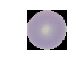

Forma:(50, 50, 3), min:0.0, max:0.793725502490997


In [14]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images50[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

Para trabajar con las imágenes, sin embargo, no queremos los colores, así que las convertiremos a blanco y negro. Como se puede ver, ahora las imágenes tienen dos dimensiones (50, 50).

In [15]:
from skimage.color import rgb2gray

In [16]:
images50 = np.array(images50)
images50 = rgb2gray(images50)

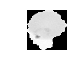

Forma:(50, 50), min:0.0, max:0.7545755796078426


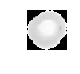

Forma:(50, 50), min:0.0, max:0.7016662922918796


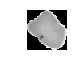

Forma:(50, 50), min:0.0, max:0.7772829098039222


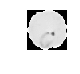

Forma:(50, 50), min:0.0, max:0.7506337254901962


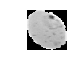

Forma:(50, 50), min:0.0, max:0.7884637850980393


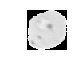

Forma:(50, 50), min:0.0, max:0.7466369058823521


In [17]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images50[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

## Arquitectura y entrenamiento

---
Finalmente, construimos la red neuronal con *TensorFlow* y la entrenamos


In [18]:
# Definir entradas y las etiquetas a esas entradas. 
x = tf.placeholder(dtype = tf.float32, shape = [None, 50,50])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Contruir la red neuronal
images_flat = tf.contrib.layers.flatten(x) # la entrada la convertimos de 50x50 a una lista de 2500
output = tf.contrib.layers.fully_connected(images_flat, 328, activation_fn=tf.tanh)
output = tf.contrib.layers.fully_connected(images_flat, 164, activation_fn=tf.tanh)
output = tf.contrib.layers.fully_connected(images_flat, 32, activation_fn=tf.tanh)
output = tf.contrib.layers.fully_connected(images_flat, 16, activation_fn=tf.tanh)
logits = tf.contrib.layers.fully_connected(output, 2, activation_fn=tf.sigmoid)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Colocations handled automatically by placer.


In [20]:
tf.set_random_seed(12345)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(1001):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images50,
                                  y: list(labels)
                              })
    if i%100 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)

EPOCH 0
Eficacia:  0.9999637
EPOCH 100
Eficacia:  0.519595
EPOCH 200
Eficacia:  0.5031207
EPOCH 300
Eficacia:  0.49695188
EPOCH 400
Eficacia:  0.48098555
EPOCH 500
Eficacia:  0.47601423
EPOCH 600
Eficacia:  0.47013572
EPOCH 700
Eficacia:  0.4678859
EPOCH 800
Eficacia:  0.4665796
EPOCH 900
Eficacia:  0.46846652
EPOCH 1000
Eficacia:  0.47031716


---
Podemos representar visualmente algunas de las imágenes y sus predicciones. En color verde se pueden observar las células cuya predicción ha sido acertada, mientras que las predicciones erróneas se han representado en color rojo.

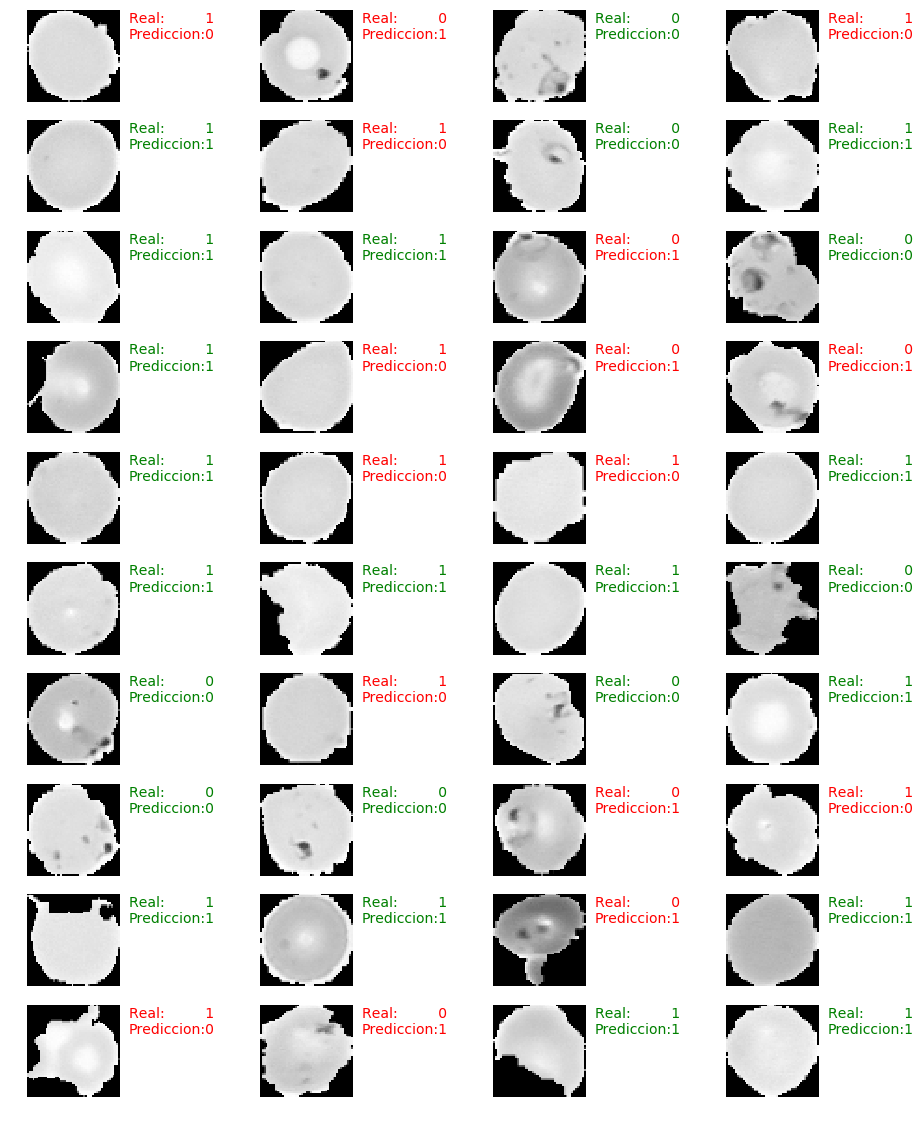

In [21]:
sample_idx = random.sample(range(len(images50)), 40)
sample_images = [images50[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(55,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()